# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline
sns.set_style('darkgrid')

# Data Wrangling
## Key Points
Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## 1. Gathering Data
### Gathering Data for this Project
Gather each of the three pieces of data as described below in a Jupyter Notebook titled `wrangle_act.ipynb`:
1. [x] The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: `twitter_archive_enhanced.csv`

2. [x] The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (`image_predictions.tsv`) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. [x] Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [2]:
# Downloading 'image_predictions.tsv'
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

    
# Download large file like 'tweet-json.txt'
response = requests.get('https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt', stream = True)

#for re-run
with open("tweet-json.txt","wb") as text_file:
    text_file.write(b"")

with open("tweet-json.txt","ab") as text_file:
    for chunk in response.iter_content(chunk_size=1024):
        text_file.write(chunk)
        

In [3]:
# files list
!ls

act_report.html        twitter-archive-enhanced.csv  wrangle_report.html
image_predictions.tsv  twitter_archive_master.csv
tweet-json.txt	       wrangle_act.ipynb


### Reading data sets

In [4]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_2 = pd.read_csv('image_predictions.tsv', sep = '\t')
df_3 = pd.read_json('tweet-json.txt', lines=True)

### Twitter API
`twitter_api.py`: This is the Twitter API code to gather some of the required data for the project.
- [x] Read the code and comments.
- [x] understand how the code works
- [x] then copy and paste it into your notebook.


<font color='red'>
    <b>Note: don't run this code please.

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

___
## Assessing Data
### Assessing Data for this Project
After gathering each of the above pieces of data:
1. [x] assess them visually and programmatically for quality and tidiness issues.
2. [x] Detect and document at least **eight (8) quality** issues.
3. [x] Detect and document at least **two (2) tidiness** issues.

in your `wrangle_act.ipynb` Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [5]:
# to show all cols
pd.set_option('display.max_columns', None)

### twitter-archive-enhanced.csv

#### Quality
1. there are 442 columns that `rating_denominator` greater than `rating_numerator` we should swap them.
2. we don't need `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `source` cols
3. `doggo`, `floofer`, `pupper`, `puppo` cols need to be in bool data type
4. `timestamp` col need to be in `datetime` data type
5. dealing with None values in `name` col
6. dealing with retweets, start with `RT` in `text` col or the not null value in `	retweeted_status_id` col
7. dog in index `1120` name is 'this'

#### Tideness
1. `doggo`, `floofer`, `pupper`, `puppo` columns are same variable.
2. combine `rating_numerator` and `rating_denominator` to same column `rate`

In [6]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_1.query('rating_denominator > rating_numerator').shape

(442, 17)

In [9]:
df_1[df_1.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [10]:
df_1.duplicated().sum()

0

In [11]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
719,783391753726550016,NaN,NaN,2016-10-04 19:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783391753...,13,10,Godi,None,None,None,None
1129,729463711119904772,NaN,NaN,2016-05-09 00:11:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pupcasso. You can't afford his art. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729463711...,13,10,Pupcasso,None,None,None,None
2171,669328503091937280,NaN,NaN,2015-11-25 01:35:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirk. He just saw a bacon wrapped tenn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669328503...,12,10,Kirk,None,None,None,None
588,799422933579902976,NaN,NaN,2016-11-18 01:24:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Longfellow (prolly sophisticated). He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799422933...,12,10,Longfellow,None,None,None,None
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,None,None,None,None
1676,682088079302213632,NaN,NaN,2015-12-30 06:37:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,NaN,NaN,NaN,https://vine.co/v/iqMjlxULzbn,12,10,None,None,None,None,None
283,838952994649550848,NaN,NaN,2017-03-07 03:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,NaN,NaN,NaN,https://twitter.com/ktla/status/83894871422799...,13,10,None,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
772,776477788987613185,NaN,NaN,2016-09-15 17:48:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776477788...,11,10,Huck,None,None,pupper,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None


In [12]:
df_1[(df_1.name == 'None') & (df_1.retweeted_status_id.isnull())].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1304,707411934438625280,NaN,NaN,2016-03-09 03:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I shall trip the big pupper with leash. Big p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/707411934...,11,10,None,None,None,pupper,None
580,800459316964663297,NaN,NaN,2016-11-20 22:02:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Appears to be por...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800459316...,12,10,None,None,None,pupper,None
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,None,None,None,None,None
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,8,10,None,None,None,None,None
1279,708845821941387268,NaN,NaN,2016-03-13 02:43:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with magic eyes. Not wearing a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708845821...,9,10,None,None,None,pupper,None
1826,676440007570247681,NaN,NaN,2015-12-14 16:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007...,11,10,None,None,None,None,None
1960,673363615379013632,NaN,NaN,2015-12-06 04:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper can't wait for Christmas. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673363615...,11,10,None,None,None,pupper,None
870,761672994376806400,NaN,NaN,2016-08-05 21:19:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,12,10,None,None,None,None,None


In [13]:
df_1.iloc[1618].text

'For those who claim this is a goat, u are wrong. It is not the Greatest Of All Time. The rating of 5/10 should have made that clear. Thank u'

In [14]:
df_1.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [15]:
df_1.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [16]:
df_1[df_1.rating_denominator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


In [17]:
df_1[df_1.name == 'this']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


### image_predictions.tsv
#### Quality

8. Dogs preed's name in `p1, p2, p3` not in same letter cases and has underscore.

#### Tideness

3. we should combine this table with our master tabel.

In [18]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_2.duplicated().sum()

0

### tweet_json.txt

#### Tideness
4. we don't need this table, we only need to add `favourit_count`, `retweet_count` columns to `df_1` tabel.

In [21]:
display(df_3.head())

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [22]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [23]:
df_3.entities.sample().values[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 813187585275109376,
   'id_str': '813187585275109376',
   'indices': [108, 131],
   'media_url': 'http://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg',
   'url': 'https://t.co/rvSANEsQZJ',
   'display_url': 'pic.twitter.com/rvSANEsQZJ',
   'expanded_url': 'https://twitter.com/dog_rates/status/813187593374461952/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 768, 'h': 1024, 'resize': 'fit'},
    'large': {'w': 768, 'h': 1024, 'resize': 'fit'},
    'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}

In [24]:
df_3.extended_entities.values[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [25]:
df_3.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [26]:
df_3.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [27]:
df_3.retweeted_status[df_3.retweeted_status.notnull()].sample().values[0]

{'created_at': 'Tue Oct 04 15:55:06 +0000 2016',
 'id': 783334639985389568,
 'id_str': '783334639985389568',
 'full_text': "This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu",
 'truncated': False,
 'display_text_range': [0, 98],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 783334603142598656,
    'id_str': '783334603142598656',
    'indices': [99, 122],
    'media_url': 'http://pbs.twimg.com/media/Ct72q9iWEAAKs3V.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/Ct72q9iWEAAKs3V.jpg',
    'url': 'https://t.co/nfprKAXqwu',
    'display_url': 'pic.twitter.com/nfprKAXqwu',
    'expanded_url': 'https://twitter.com/dog_rates/status/783334639985389568/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 576, 'h': 1024, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 576, 'h': 1024, 'resize': 'fit'},
     

___
## Cleaning Data

### Cleaning Details
Clean each of the issues you documented while assessing. Perform this cleaning in `wrangle_act.ipynb` as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.


### Assesses Result:
#### Quality
`twitter-archive-enhanced.csv`
1. [x] there are 442 columns that `rating_denominator` greater than `rating_numerator` we should swap them.
2. we don't need `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `source` cols
3. `doggo`, `floofer`, `pupper`, `puppo` cols need to be in bool data type
4. `timestamp` col need to be in `datetime` data type
5. dealing with None values in `name` col
6. dealing with retweets, start with `RT` in `text` col or the not null value in `	retweeted_status_id` col
7. dog in index `1120` name is 'this'

`image_predictions.tsv`
8. Dogs preed's name in `p1, p2, p3` not in same letter cases and has underscore.


#### Tideness
`twitter-archive-enhanced.csv`
1. `doggo`, `floofer`, `pupper`, `puppo` columns are same variable.
2. combine `rating_numerator` and `rating_denominator` to same column `rate`

`image_predictions.tsv`
3. we should combine this table with our master tabel.

`tweet_json.txt`
4. we don't need this table, we only need to add `favourit_count`, `retweet_count` columns to `df_1` tabel.



In [28]:
# Data Copies

dc_1 = df_1.copy()
dc_2 = df_2.copy()
dc_3 = df_3.copy()

## Quality
### Cleaning Define
`twitter-archive-enhanced.csv`
1. there are 442 columns that `rating_denominator` greater than `rating_numerator`.
    * [x] we need to swap them we will use 
        ```python
        x, y = y, x```
    thanks to **Sir. Guido van Rossum** for that feture, **i'll solve that in second tidness issue**.
    * [x] we need to use `.loc[]`   

In [29]:
bool_indx = pd.Series(dc_1.rating_denominator > dc_1.rating_numerator)

In [30]:
dc_1.loc[bool_indx, 'rating_denominator'], dc_1.loc[bool_indx, 'rating_numerator'] = dc_1.loc[bool_indx, 'rating_numerator'], dc_1.loc[bool_indx, 'rating_denominator']

### Test

In [31]:
len(dc_1.query('rating_denominator > rating_numerator'))

0

___
2. we don't need `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `source` cols
    * [x] we can drop them using `.drop()` meathod but i'll do it using assign operator.


In [32]:
dc_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [33]:
dc_1 = dc_1[['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

### Test

In [34]:
dc_1.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [35]:
dc_1.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


___
3. `doggo`, `floofer`, `pupper`, `puppo` cols need to be in bool data type
    * [x] first: we'll replace any `'None'` value with `np.nan` using `.replace()` method
    * [x] seconde: we'll replace any not nan value with `'True'`
    * [x] third: we'll use `.astype(bool)` to change it's type

In [36]:
dc_1.doggo = dc_1.doggo.str.replace('None', '')
dc_1.floofer = dc_1.floofer.str.replace('None', '')
dc_1.pupper = dc_1.pupper.str.replace('None', '')
dc_1.puppo = dc_1.puppo.str.replace('None', '')


In [37]:
dc_1.loc[dc_1.doggo != '', 'doggo'] =  'True'
dc_1.loc[dc_1.floofer != '', 'floofer'] =  'True'
dc_1.loc[dc_1.pupper != '', 'pupper'] =  'True'
dc_1.loc[dc_1.puppo != '', 'puppo'] =  'True'


In [38]:
dc_1.doggo = dc_1.doggo.astype(bool)
dc_1.floofer = dc_1.floofer.astype(bool)
dc_1.pupper = dc_1.pupper.astype(bool)
dc_1.puppo = dc_1.puppo.astype(bool)


### Test

In [39]:
dc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null bool
floofer               2356 non-null bool
pupper                2356 non-null bool
puppo                 2356 non-null bool
dtypes: bool(4), int64(3), object(3)
memory usage: 119.7+ KB


In [40]:
dc_1.doggo.value_counts()

False    2259
True       97
Name: doggo, dtype: int64

In [41]:
dc_1.floofer.value_counts()

False    2346
True       10
Name: floofer, dtype: int64

In [42]:
dc_1.pupper.value_counts()

False    2099
True      257
Name: pupper, dtype: int64

In [43]:
dc_1.puppo.value_counts()

False    2326
True       30
Name: puppo, dtype: int64

___
4. `timestamp` col need to be in `datetime` data type
    * [x] we will use `pd.to_datetime` method
    
**Note:** we can aslo use `dc_1.timestamp.astype('datetime64')`

In [44]:
dc_1.timestamp = pd.to_datetime(dc_1.timestamp)

### Test


In [45]:
dc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null bool
floofer               2356 non-null bool
pupper                2356 non-null bool
puppo                 2356 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(3), object(2)
memory usage: 119.7+ KB


___
5. dealing with None values in `name` col
    * [x] we teed to replace it with Nan value using `np.nan()`

In [46]:
dc_1.name = dc_1.name.replace('None', np.nan)

### Test

In [47]:
dc_1.name.isnull().sum()

745

___
6. dealing with retweets, start with `RT` in `text` col or the not null value in `	retweeted_status_id` col
    * [x] we need to get all tweets starts with `'RT'` using `dc_1.text.str[:2]` and remove them

In [48]:
len(dc_1.loc[dc_1.text.str[:2] == 'RT', :])

183

In [49]:
dc_1 = dc_1.loc[dc_1.text.str[:2] != 'RT', :]

### Test

In [50]:
len(dc_1.loc[dc_1.text.str[:2] == 'RT', :])

0

In [51]:
dc_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
text                  2173 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  1495 non-null object
doggo                 2173 non-null bool
floofer               2173 non-null bool
pupper                2173 non-null bool
puppo                 2173 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(3), object(2)
memory usage: 127.3+ KB


___
7. dog in index `1120` name is 'this'
    * [x] check there is no other named `'this'`
    * [x] replace it the real name if exist

In [52]:
(dc_1.name == 'this').sum()

1

In [53]:
dc_1.loc[dc_1.name == 'this', 'name'] = np.nan

### Test

In [54]:
(dc_1.name == 'this').sum()

0

___
`image_predictions.tsv`
8. Dogs preed's name in `p1, p2, p3` not in same letter cases and has underscore.
    * [x] replace `'_'` with a space
    * [x] use `str.title()` method to make all of them in the same case.

In [55]:
dc_2.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [56]:
dc_2.p1 = dc_2.p1.str.replace('_', ' ').str.title()
dc_2.p2 = dc_2.p2.str.replace('_', ' ').str.title()
dc_2.p3 = dc_2.p3.str.replace('_', ' ').str.title()

### Test

In [57]:
dc_2.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True


In [58]:
dc_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1402,768970937022709760,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,Pomeranian,0.182358,True,Golden Retriever,0.110658,True,Mousetrap,0.086399,False
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,Space Heater,0.206876,False,Spatula,0.123450,False,Vacuum,0.119218,False
1233,746131877086527488,https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg,1,Chow,0.575637,True,Pomeranian,0.195950,True,Norwich Terrier,0.141224,True
1793,831262627380748289,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,Cocker Spaniel,0.263323,True,Brittany Spaniel,0.200550,True,Doormat,0.193414,False
1257,748575535303884801,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,1,Muzzle,0.176172,False,Seat Belt,0.160953,False,Soft-Coated Wheaten Terrier,0.086499,True
559,677700003327029250,https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg,1,Siberian Husky,0.120849,True,Junco,0.079206,False,Malamute,0.063088,True
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,Dishwasher,0.700466,False,Golden Retriever,0.245773,True,Chow,0.039012,True
1470,779123168116150273,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1,Toy Poodle,0.431080,True,Soft-Coated Wheaten Terrier,0.060365,True,Cocker Spaniel,0.059845,True
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True
114,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador Retriever,0.209051,True,Hog,0.203980,False,Newfoundland,0.165914,True


## Tideness
### Cleaning Define
`twitter-archive-enhanced.csv`
1. `doggo`, `floofer`, `pupper`, `puppo` columns are same variable.
    * [x] first: we will replace `False` values with `np.nan` to help us when using `.idxmax` method.
    * [x] seconde: we'll use `.idxmax` method to coombine them
    * [x] third: we'll drop `doggo`, `floofer`, `pupper`, `puppo` columns 

In [59]:
dc_1.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [60]:
dc_1.loc[:,['doggo', 'floofer', 'pupper', 'puppo']] = dc_1.loc[:,['doggo', 'floofer', 'pupper', 'puppo']].replace(False, np.nan)

In [61]:
dc_1['stage'] = dc_1.loc[:,['doggo', 'floofer', 'pupper', 'puppo']].idxmax(1)

In [62]:
dc_1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

### Test

In [63]:
dc_1.stage.value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: stage, dtype: int64

In [64]:
dc_1.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN


___
2. combine `rating_numerator` and `rating_denominator` to same column `rate`
    1. [x] we will calculate `rating_denominator / rating_numerator`.
    2. [x] we will drop them.
    3. [x] we will check there is no `rate` greater than 1.

In [65]:
dc_1['rate'] = dc_1.rating_denominator / dc_1.rating_numerator

In [66]:
dc_1.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

### Test

In [67]:
(dc_1.rate > 1).sum()

0

In [68]:
dc_1.head(1)

,tweet_id,timestamp,text,name,stage,rate
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,0.769231


___
`image_predictions.tsv`
3. we should combine this table with our master tabel.

In [69]:
dc_1 = dc_1.merge(on = 'tweet_id', right = dc_2, how = "inner")

### Test

In [70]:
dc_1.head(1)

,tweet_id,timestamp,text,name,stage,rate,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,0.769231,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False


___
`tweet_json.txt`
4. we don't need this table, we only need to add `favourit_count`, `retweet_count` columns to `df_1` tabel.
    1. [x] we'll change to be only with `id`, `favourit_count`, `retweet_count` cols.
    2. [x] we'll join `dc_3` table with `dc_1` table using `merge` method

In [71]:
dc_3 = dc_3[['id', 'favorite_count', 'retweet_count']]

In [72]:
dc_1 = dc_1.merge(dc_3, left_on = 'tweet_id', right_on = 'id', how = 'inner')

In [73]:
dc_1.drop('id', axis = 1, inplace = True)

### Test

In [74]:
dc_1.head(1)

,tweet_id,timestamp,text,name,stage,rate,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,0.769231,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,39467,8853


# Wrangling Data is finished, Thanks to Allah <3

# Storing, Analyzing, and Visualizing Data for this Project
Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv`. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your `wrangle_act.ipynb` Jupyter Notebook. At least **three (3) insights and one (1) visualization** must be produced.

1. [x] What the most prediction of dogs breeds that more than or equale 75% confidence
2. [x] What breed of dog with highst favourite count and breed of dog with hieghst retweet count?
3. [x] Whats common stages for top rated dogs?

In [75]:
dc_1.to_csv('twitter_archive_master.csv', index = False)

___

In [76]:
df = pd.read_csv('twitter_archive_master.csv', parse_dates = ['timestamp'])

In [77]:
df.head()

,tweet_id,timestamp,text,name,stage,rate,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,0.769231,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,0.769231,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,0.833333,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,0.769231,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,0.833333,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,41048,9774


## Question 1:
### What the most prediction of dogs breeds that more than or equale 75% confidence

In [78]:
first_query = df.query('(p1_conf >= 0.75) & (p1_dog == True)')['p1'].value_counts()[:10]
first_query

Golden Retriever      78
Pembroke              47
Labrador Retriever    41
Pug                   34
Chihuahua             25
Pomeranian            22
Samoyed               22
Chow                  16
French Bulldog        14
Toy Poodle            13
Name: p1, dtype: int64

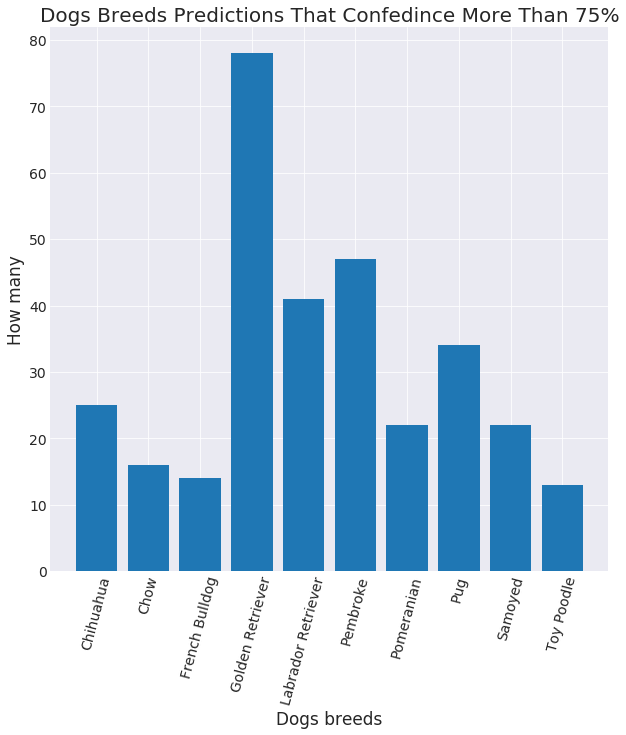

In [79]:
plt.figure(figsize = (10, 10))

plt.bar(first_query.index, first_query.values)

plt.title('Dogs Breeds predictions that confedince more than 75%'.title(), fontsize = 20)

plt.xticks(rotation=75, fontsize = 14)
plt.xlabel("Dogs breeds", fontsize = 17)

plt.yticks(fontsize = 14)
plt.ylabel("How many", fontsize = 17);


## Question 2
### What breed of dog with highst favourite count and breed of dog with hieghst retweet count?

In [80]:
highst_count = df[['favorite_count', 'retweet_count']].max()


In [81]:
highst_favorite = df[df.tweet_id == df.query('favorite_count == @highst_count[0]').tweet_id.values[0]][['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]
highst_favorite_breed = highst_favorite.query('p1_conf > 0.50')['p1']

display(highst_favorite)
display(highst_favorite_breed)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True


Series([], Name: p1, dtype: object)

In [82]:
df.text[df.favorite_count == highst_count[0]].values[0]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

___
After maniual search i found the real type of the dog.<br>
Source: http://www.vetstreet.com/our-pet-experts/dogs-join-womens-march

In [83]:
highst_favorite.loc[:, ['p1_conf', 'p2_conf', 'p3_conf']] = [0, 100, 0]
highst_favorite_breed = highst_favorite['p2']

print('breed of dog with highst favorite count: {}\nwith favorite count: {}'
      .format(highst_favorite_breed.values[0], highst_count[0]))

breed of dog with highst favorite count: Labrador Retriever
with favorite count: 132810


In [84]:
highst_retweet = df[df.tweet_id == df.query('retweet_count == @highst_count[1]').tweet_id.values[0]][['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]
highst_retweet_breed = highst_retweet['p1']

print('breed of dog with highst retweet count: {}\nwith retweet count: {}'
      .format(highst_retweet_breed.values[0], highst_count[1]))

breed of dog with highst retweet count: Labrador Retriever
with retweet count: 79515


## Question 3
### Whats common stages for top rated dogs?


In [85]:
breed_rates = df.groupby('stage').agg({'rate':[np.mean, np.std]})['rate'].sort_values(['mean', 'std'], ascending = False)
breed_rates

,mean,std
stage,,
pupper,0.873017,0.106992
floofer,0.840493,0.087069
puppo,0.834343,0.084625
doggo,0.832218,0.090478
